In [3]:
Fluid_table = {
    "A" : "837488367382","B" : "387648836483","C" : "387848380104",
    "D" : "652891036300","E" : "836720081012","F" : "826702700028",
    "G" : "847390710107","H" : "736301830110","I" : "736301074637",
    "J" : "736280207460","K" : "844820183001","L" : "836701838001",
    "M" : "837729030840","N" : "837801001200","O" : "836019301330",
    "P" : "827773600120","Q" : "927827930018","R" : "928883001012",
    "S" : "928880291901","T" : "938820193801","U" : "928900190019",
    "V" : "837201002183","W" : "288379230019","X" : "837720001880",
    "Y" : "019920018829","Z" : "927700189201","a" : "001283891881",
    "b" : "836482777001","c" : "001838998327","d" : "001838100193",
    "e" : "001838883079","f" : "927840018300","g" : "002884829910",
    "h" : "827810018201","i" : "190298289910","j" : "102882819029",
    "k" : "199200018391","l" : "917820001820","m" : "892020018829",
    "n" : "902838820011","o" : "288370018201","p" : "829370238018",
    "q" : "928920001829","r" : "993797838279","s" : "938290100018",
    "t" : "993891001882","u" : "938991001920","v" : "839010101982",
    "w" : "937819939001","x" : "938910019381","y" : "837910001930",
    "z" : "837810000002","0" : "837810018001","1" : "100293881099",
    "2" : "993780019201","3" : "992001839891","4" : "839001900019",
    "5" : "838910001901","6" : "873781001880","7" : "883920018920",
    "8" : "774900199388","9" : "993781993902","+" : "838820001993",
    "/" : "939900189300","," : "884879001900","." : "883788190018",
    "?" : "883789918830","!" : "939900018920",":" : "883780001999",
    ";" : "883780000199","'" : "883999188380",
    "-" : "737290018309","_" : "884902898283","(" : "838829940018",
    ")" : "837880001820","{" : "736883800182","}" : "883780018018",
    "[" : "837000182881","]" : "888278001901","\\": "838190029100",
    "|" : "883900028801","~" : "883000189201",
    "@" : "883719000181","#" : "892872000182","$" : "737000188202",
    "%" : "737000182912","^" : "837800019283","&" : "778000180001",
    "*" : "883290001011","`":"772982882195"
}
Number_division_table={
    "1":"1001001101",
    "2":"1101011011",
    "3":"1010011001",
    "4":"1000101101",
    "5":"1000111110",
    "6":"1001110110",
    "7":"1001101110",
    "8":"1011001101",
    "9":"1010100010",
    "0":"1000111100"
}
keyOperator={
    "1":"?",
    "0":"NUL"
}
reverse_bit={
    "63":"111111",
    "0":"000000"
}


In [1]:
pip install getmac

  Using cached getmac-0.9.5-py2.py3-none-any.whl.metadata (35 kB)
Using cached getmac-0.9.5-py2.py3-none-any.whl (35 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import os
import uuid
from getmac import get_mac_address


def convert_pwd_in_array(password):
    concat_values = ""
    print("Encryption is Started..........")
    print(password)
    for char in password:
        if char in Fluid_table:
            concat_values += Fluid_table[char]
    return password_conversion_char_array(concat_values)

def get_system_hardware_info():
    random_generate_system_key = uuid.getnode()
    mac_address = get_mac_address()
    print("Mac Address: {}".format(mac_address))
    return mac_address, random_generate_system_key

def password_conversion_char_array(values):
    filter_num = ""
    for char in values:
        if char in Number_division_table:
            filter_num += Number_division_table[char]
    print(filter_num)
    return break_string(filter_num)

def break_string(filter_num):
    replacement_array = []
    break_point = list(filter_num.strip())
    for point in break_point:
        if point in keyOperator:
            replacement_array.append(keyOperator[point])
        else:
            print("Something went wrong")
    print("Replacement Array: ",replacement_array)
    return replacement_array_in_binary(replacement_array)

def replacement_array_in_binary(replacement_array):
    binary_list = []
    for item in replacement_array:
        binary_value = '000000' if item == 'NUL' else format(ord(item), '06b')
        binary_list.append(binary_value)
    return fluid_encrypt(binary_list)

def fluid_encrypt(binary_list):
    bit_list = [int(bit) for binary_string in binary_list for bit in binary_string]

    if len(bit_list) < 6:
        print("Error: Not enough bits for operation")
        return None

    xor_results = [bit_list[i] ^ bit_list[i + 1] for i in range(len(bit_list) - 1)]
    xor_and_results = [xor_results[i] ^ xor_results[i + 1] for i in range(len(xor_results) - 1)]
    xor_result_final = xor_and_results[0] if xor_and_results else 0
    original_bit = bit_list[0]
    mac_address = get_mac_address()
    system_info = get_system_hardware_info()
    print("Encryption MAC Address: ", mac_address)
    print("Encryption System Info: ", system_info)
    print("Encrypted Bit: ", original_bit)
    print("Encrypted Password Pattern: ", xor_results)
    reverse_fluid_encrypt(xor_results, original_bit, mac_address, system_info)
    # Return encrypted data instead of immediately decrypting
    return {
        'xor_results': xor_results,
        'original_bit': original_bit,
        'mac_address': mac_address,
        'system_info': system_info
    }

def reverse_fluid_encrypt(xor_results, original_bit, mac_address, system_info):
    print("Now Decryption is Started.........")
    if mac_address == get_mac_address() and system_info == get_system_hardware_info():
        reversed_bits = [original_bit]
        print("Decryption MAC Address: ", mac_address)
        print("Decryption System Info: ", system_info)
        print("Decrypted Bits: ", reversed_bits)
        for i in range(len(xor_results)):
            next_bit = xor_results[i] ^ reversed_bits[-1]
            reversed_bits.append(next_bit)

        grouped_bits = []
        for i in range(0, len(reversed_bits), 6):
            chunk = reversed_bits[i:i + 6]
            if len(chunk) < 6:
                continue
            combined_value = sum(bit << (5 - j) for j, bit in enumerate(chunk))
            grouped_bits.append(combined_value)

        grouped_bits = [1 if value == 63 else value for value in grouped_bits]
        decrypted_string = ''.join(chr(value + ord(' ')) for value in grouped_bits)
        print("Decrypted String: ", decrypted_string)
        combined_list = []

        for i in range(0, len(grouped_bits), 10):
            combined_string = ''.join(str(grouped_bits[j]) for j in range(i, min(i + 10, len(grouped_bits))))
            combined_list.append(combined_string)

        replaced_list = []
        for combined_item in combined_list:
            matched_key = None
            for key, num_value in Number_division_table.items():
                if num_value == combined_item:
                    matched_key = key
                    break
            replaced_list.append(matched_key if matched_key else combined_item)

        new_combined_list = combine_elements(replaced_list, 12)
        print("Comnined List: ",new_combined_list)
        return replace_with_fluid_keys(new_combined_list)
    else:
        print("Unauthorized Access.... Decryption Denied........", get_mac_address())
        return None

def replace_with_fluid_keys(new_combined_list):
    replaced_with_keys = []
    for combined_item in new_combined_list:
        matched_key = None
        for key, value in Fluid_table.items():
            if value == combined_item:
                matched_key = key
                break
        replaced_with_keys.append(matched_key if matched_key else combined_item)

    Decrypted_string = "".join(replaced_with_keys)
    print(f"Decrypted string: {Decrypted_string}")
    return Decrypted_string

def combine_elements(replaced_list, group_size):
    new_combined_list = []
    for i in range(0, len(replaced_list), group_size):
        combined_string = ''.join(replaced_list[i:i + group_size])
        new_combined_list.append(combined_string)
    return new_combined_list

if __name__ == "__main__":
    password = "gaurav1324@@"
    decrypted_string = convert_pwd_in_array(password)
    print("Decrypted string in main:", decrypted_string)
    

Encryption is Started..........
gaurav1324@@
1000111100100011110011010110111011001101101100110110001011011011001101110101101110101000101010100010100100110110001111001000111100100011110010010011011101011011101100110110100110011011001101101010001010010011011011001101101100110110010011011010100010101001100110110011011010100010101010001010010011011000111100100011110010010011011010100010110101101110001111001010100010101010001010100110011001101110101010001010011011101011001101101001100110110011011101011011100110111010101000101000111100100011110010010011011101011011101100110110100110011011001101101010001010010011011011001101101100110110010011011011001101101001100110101000101000111100100100110110001111001001001101100011110010010011011010100010101100110111010110111001001101100011110010001111001101011011101010001010100110011011001101101100110110010011011000111100101010001010101000101010100010101010001011010110111000111100100011110010010011011011001101101001100110101000101011001101101010001010010

In [15]:


import numpy as np
import pandas as pd
import random
import string

def generate_random_password(min_length=8, max_length=16):
    """Generate a random password with varying length and characters"""
    length = random.randint(min_length, max_length)
    # Include lowercase, uppercase, digits, and special characters
    characters = string.ascii_letters + string.digits + '@#$%&*'
    return ''.join(random.choice(characters) for _ in range(length))

def extract_features(encrypted_data):
    """Extract numerical features from encrypted data"""
    if not encrypted_data or not isinstance(encrypted_data, dict):
        return None
    
    features = []
    
    # Get XOR results and convert to numerical features
    xor_results = encrypted_data.get('xor_results', [])
    # Take first 20 XOR results (pad with 0 if less)
    xor_features = xor_results[:20] + [0] * (20 - len(xor_results))
    features.extend(xor_features)
    
    # Add original bit
    features.append(encrypted_data.get('original_bit', 0))
    
    return features

def generate_encryption_dataset(n_samples=1000):
    """Generate a dataset of encrypted passwords with features"""
    encryption_data = []
    X = []  # Features
    y = []  # Labels (we'll use password length as a simple label)
    
    for _ in range(n_samples):
        try:
            # Generate random password
            plaintext = generate_random_password()
            
            # Encrypt the password
            encrypted_data = convert_pwd_in_array(plaintext)
            
            # Extract features
            features = extract_features(encrypted_data)
            
            if features is not None:
                X.append(features)
                y.append(len(plaintext))  # Use password length as label
                
                encryption_data.append({
                    'plaintext': plaintext,
                    'encrypted_data': encrypted_data,
                    'password_length': len(plaintext)
                })
                
        except Exception as e:
            print(f"Error processing sample: {e}")
            continue
    
    # Convert to numpy arrays
    X = np.array(X)
    y = np.array(y)
    
    # Create DataFrame with the collected data
    df = pd.DataFrame(encryption_data)
    
    return X, y, df

# Generate the dataset
try:
    X, y, df = generate_encryption_dataset(100)  # Start with 100 samples first
    
    print("\nDataset Shape:")
    print(f"Features (X) shape: {X.shape}")
    print(f"Labels (y) shape: {y.shape}")
    print("\nSample of the DataFrame:")
    print(df.head())
    
    # Basic statistics
    print("\nPassword Length Statistics:")
    print(df['password_length'].describe())
    
except Exception as e:
    print(f"Error generating dataset: {e}")

Encryption is Started..........
5Gff5OSwFw@
678901234578901234568901234567901234567801234567891234509876234509876534509876544509876543509876543209876543219876543210678901234578901234568901234567901234567801234567891234509876234509876534509876544509876543509876543209876543219876543210321098765421098765431098765432098765432112345678902345678901345678901245678901235678901234678901234578901234568901234567321098765421098765431098765432098765432112345678902345678901345678901245678901235678901234678901234578901234568901234567
Replacement Array:  ['F', 'G', 'H', 'I', 'NUL', 'A', 'B', 'C', 'D', 'E', 'G', 'H', 'I', 'NUL', 'A', 'B', 'C', 'D', 'E', 'F', 'H', 'I', 'NUL', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'NUL', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'NUL', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'A', 'B', 'C', 'D', 'E', 'NUL', 'I', 'H', 'G', 'F', 'B', 'C', 'D', 'E', 'NUL', 'I', 'H', 'G', 'F', 'E', 'C', 'D', 'E', 'NUL', 'I', 'H', 'G', 'F', 'E', 'D', 'D', 'E', 'NUL', 'I', 'H', 'G', 'F', '

In [16]:
df.head()

,plaintext,encrypted_data,password_length
0,5Gff5OSwFw@,"{'xor_results': [1, 0, 0, 1, 0, 1, 1, 1, 0, 0,...",11
1,adpiIHSZ0$,"{'xor_results': [1, 0, 0, 0, 0, 1, 0, 1, 0, 0,...",10
2,io%ARLe2lV,"{'xor_results': [1, 0, 1, 1, 0, 1, 1, 0, 0, 0,...",10
3,MMbCNmXLnW6ng,"{'xor_results': [1, 0, 0, 0, 1, 1, 1, 1, 0, 0,...",13
4,S5FBG4jBeGGNTsM,"{'xor_results': [0, 0, 0, 0, 0, 1, 1, 0, 0, 0,...",15


Decision Tree Performance:
-------------------------
Accuracy: 0.05

Classification Report:
              precision    recall  f1-score   support

           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         4
          10       0.14      0.50      0.22         2
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         4

    accuracy                           0.05        20
   macro avg       0.02      0.06      0.02        20
weighted avg       0.01      0.05      0.02        20



c:\Users\Welcome\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Welcome\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Welcome\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera


Top 5 Most Important Features:
   feature  importance
18  XOR_18    0.170324
2    XOR_2    0.136848
17  XOR_17    0.117243
13  XOR_13    0.113144
8    XOR_8    0.110900

Analysis for sample 0:
True password length: 15
Predicted password length: 10

Decision path:
XOR_13 <= 0.500: False
XOR_8 <= 0.500: True
XOR_17 <= 0.500: True
XOR_10 <= 0.500: True
XOR_18 <= 0.500: False

Analysis for sample 1:
True password length: 16
Predicted password length: 10

Decision path:
XOR_13 <= 0.500: False
XOR_8 <= 0.500: True
XOR_17 <= 0.500: True
XOR_10 <= 0.500: True
XOR_18 <= 0.500: False

Analysis for sample 2:
True password length: 10
Predicted password length: 10

Decision path:
XOR_13 <= 0.500: False
XOR_8 <= 0.500: True
XOR_17 <= 0.500: False
XOR_11 <= 0.500: False
XOR_14 <= 0.500: False


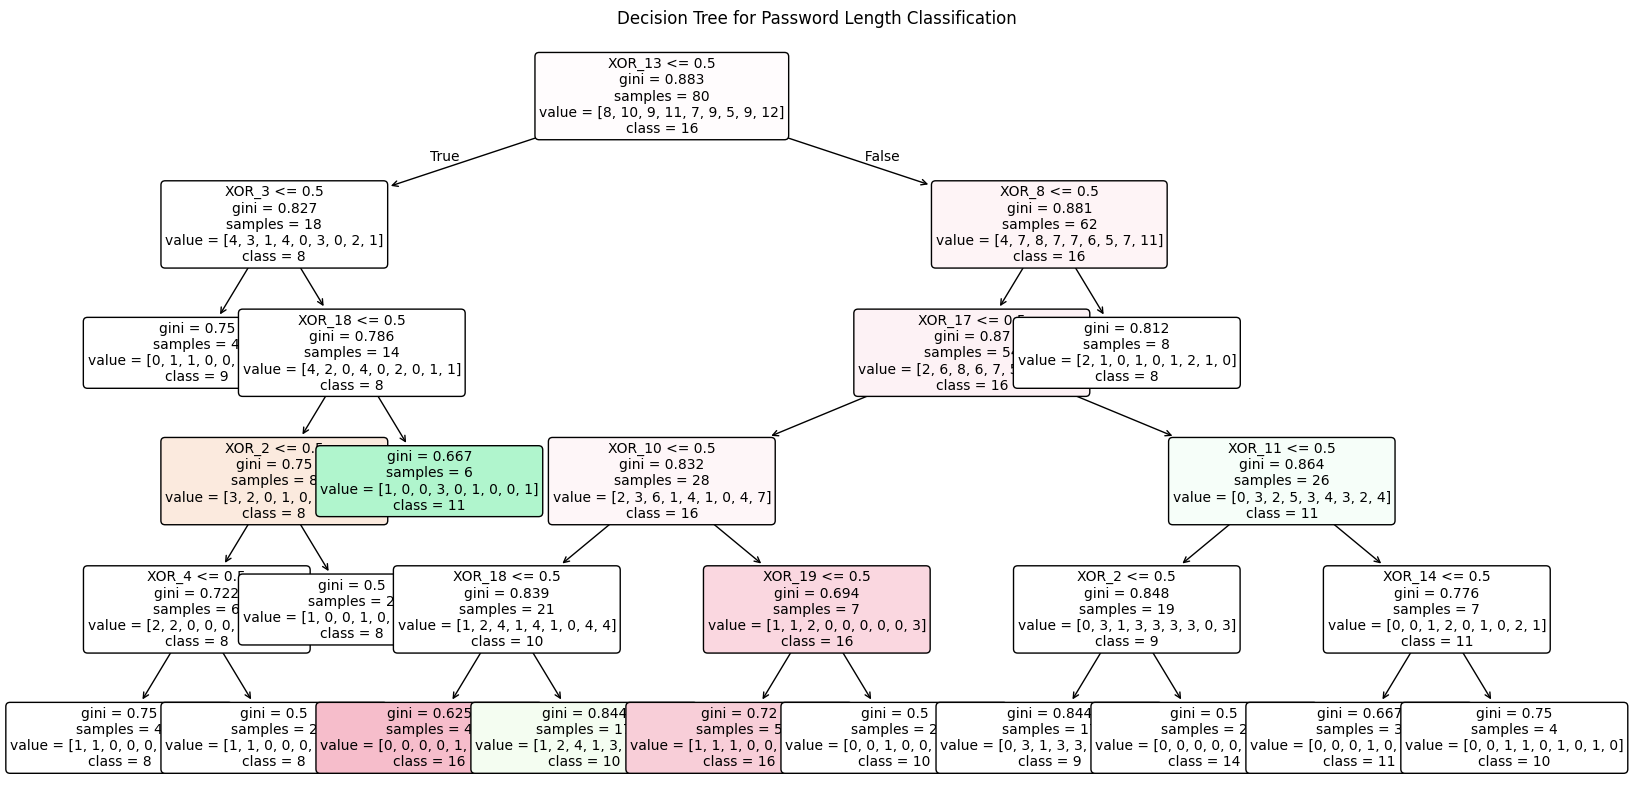

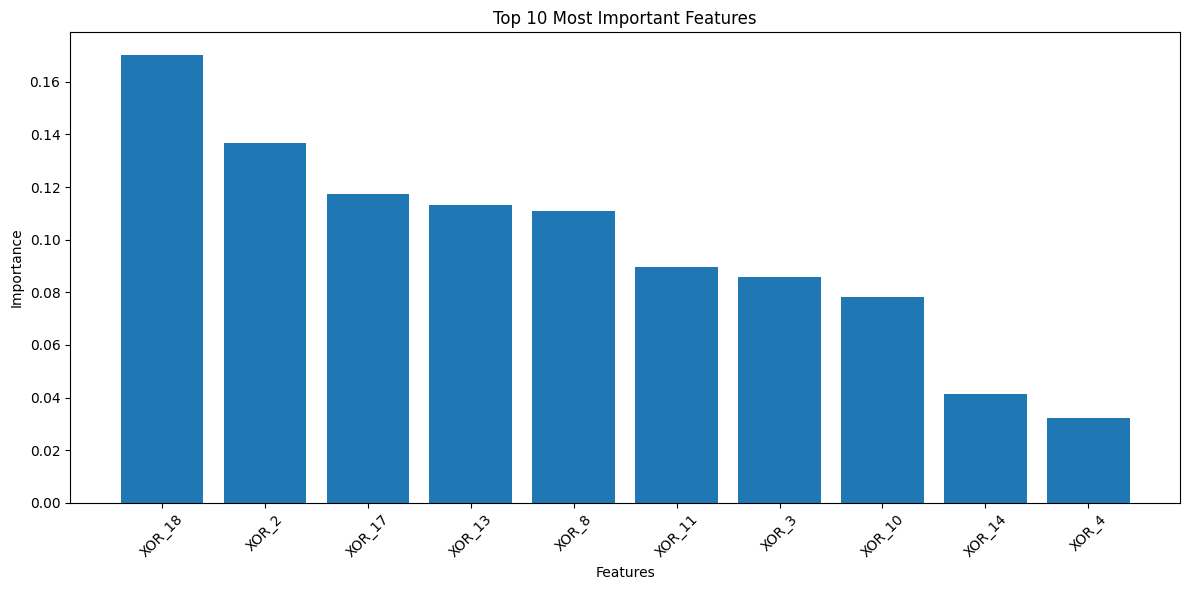

In [17]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# First, let's prepare the data properly
def prepare_features(df):
    # Extract XOR results from the encrypted_data dictionary and create features
    X = []
    for _, row in df.iterrows():
        xor_results = row['encrypted_data']['xor_results']
        # Take first 20 elements (pad with zeros if needed)
        features = xor_results[:20] + [0] * (20 - len(xor_results))
        X.append(features)
    return np.array(X)

# Prepare the data
X = prepare_features(df)
y = df['password_length'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree
dt_classifier = DecisionTreeClassifier(
    max_depth=5,  # Limit tree depth to prevent overfitting
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)

# Print model performance
print("Decision Tree Performance:")
print("-------------------------")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt_classifier, 
          feature_names=[f'XOR_{i}' for i in range(20)],
          class_names=[str(i) for i in sorted(set(y))],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree for Password Length Classification")

# Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': [f'XOR_{i}' for i in range(20)],
    'importance': dt_classifier.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12,6))
plt.bar(feature_importance['feature'][:10], feature_importance['importance'][:10])
plt.title('Top 10 Most Important Features')
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()

# Print top 5 most important features
print("\nTop 5 Most Important Features:")
print(feature_importance.head())

# Additional analysis: Decision paths for sample predictions
def explain_prediction(sample_index):
    sample = X_test[sample_index]
    true_length = y_test[sample_index]
    predicted_length = dt_classifier.predict([sample])[0]
    
    print(f"\nAnalysis for sample {sample_index}:")
    print(f"True password length: {true_length}")
    print(f"Predicted password length: {predicted_length}")
    
    # Get the decision path
    path = dt_classifier.decision_path([sample])
    node_indices = path.indices
    
    print("\nDecision path:")
    for idx in node_indices:
        if idx < len(dt_classifier.tree_.feature) and dt_classifier.tree_.feature[idx] >= 0:
            feature = dt_classifier.tree_.feature[idx]
            threshold = dt_classifier.tree_.threshold[idx]
            print(f"XOR_{feature} <= {threshold:.3f}: {sample[feature] <= threshold}")

# Explain a few sample predictions
for i in range(3):
    explain_prediction(i)
